1. Descarga la base de datos utilizando el paquete sqlite3 en python
2. Crea una consulta básica sobre la tabla Country
*  De una vez almacenaremos en dataframes todas las tablas a utilizar en esta Parte 1 (Preguntas 1 a la 7).

In [120]:
# Create a SQL connection to the SQLite database
import sqlite3
import pandas as pd
con = sqlite3.connect("database.sqlite")

# Access to the tables and store them as dataframes
country = pd.read_sql_query("SELECT * from Country", con)
match = pd.read_sql_query("SELECT * from Match", con)
league = pd.read_sql_query("SELECT * from League", con)
team = pd.read_sql_query("SELECT * from Team", con)
player = pd.read_sql_query("SELECT * from PLAYER", con)
player_attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)

# Close the connection to SQLite
con.close()

3. Une la tabla Country con la tabla League para saber que liga corresponde a cada país

In [101]:
# Left Join Country to League
league_country = league.merge(country, left_on='country_id', right_on='id', how='left')

In [102]:
# Rename columns for better reading
league_country.rename(columns = {'id_x':'league_id', 'name_x':'league', 'name_y':'country'}, inplace = True)

In [103]:
# Drop unnecesary columns
league_country.drop(['id_y'], axis=1, inplace=True)

In [104]:
# Preview the new table: league_country
league_country.head()

,league_id,country_id,league,country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


4. Crea una consulta con las siguientes tablas - Match, Country, League, Team - donde veamos la siguiente información de cada uno de los partidos jugados en España:
* country_name =”Spain”
* Match.id, Country.name, League.name, Match.season, Match.stage, Match.date, Team.team_long_name (nombre del equipo local), Team.team_long_name(nombre del equipo visitante), Match.home_team_goal, Match.away_team_goal
* Los registros deben estar ordenados por fecha


In [105]:
# First we select the required columns for the final table: match
match_4 = match[['country_id', 'league_id', 'id', 'season', 'stage', 'date', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]

In [106]:
# Add the country name
country.rename(columns={'id':'country_id', 'name':'country'}, inplace=True)
match_4 = match_4.merge(country, on='country_id', how='left')

In [107]:
# Add the league name
league.rename(columns={'id':'league_id', 'name':'league'}, inplace=True)
league.drop(['country_id'], axis=1, inplace=True)
match_4 = match_4.merge(league, on='league_id', how='left')

In [108]:
# Add the home team name
home_teams = team[['team_api_id', 'team_long_name']]
home_teams.rename(columns={'team_api_id':'home_team_api_id', 'team_long_name':'home_team'}, inplace=True)
match_4 = match_4.merge(home_teams, on='home_team_api_id', how='left')

C:\Users\mauro\AppData\Local\Temp\ipykernel_20444\2998592971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_teams.rename(columns={'team_api_id':'home_team_api_id', 'team_long_name':'home_team'}, inplace=True)


In [109]:
# Add the away team name
away_teams = team[['team_api_id', 'team_long_name']]
away_teams.rename(columns={'team_api_id':'away_team_api_id', 'team_long_name':'away_team'}, inplace=True)
match_4 = match_4.merge(away_teams, on='away_team_api_id', how='left')

C:\Users\mauro\AppData\Local\Temp\ipykernel_20444\2812208859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_teams.rename(columns={'team_api_id':'away_team_api_id', 'team_long_name':'away_team'}, inplace=True)


In [110]:
# Remove id columns
match_4 = match_4[['id', 'country', 'league', 'season', 'stage', 'date', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal']]

# Filter for Spain
match_4_spain = match_4.loc[match_4['country'].isin(['Spain'])]

# Sort by date ascending
match_4_spain.sort_values(by=['date'], ascending=True, inplace=True)

# Print the final table
match_4_spain

C:\Users\mauro\AppData\Local\Temp\ipykernel_20444\1961591268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_4_spain.sort_values(by=['date'], ascending=True, inplace=True)


,id,country,league,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
21517,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
21524,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
21526,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0
21523,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
21522,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
...,...,...,...,...,...,...,...,...,...,...
24490,24491,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Betis Balompié,Getafe CF,2,1
24489,24490,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Sporting de Gijón,Villarreal CF,2,0
24491,24492,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,RCD Espanyol,SD Eibar,4,2
24494,24495,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Málaga CF,UD Las Palmas,4,1


5. Utilizando las mismas tablas de la consulta anterior, queremos encontrar varias estadísticas para cada uno de los siguientes paises - country_name : ('Spain', 'Germany', 'France', 'Italy', 'England'). Queremos agregar esta informacion por pais, liga y temporada (season).
Las estadisticas que queremos ver son:
* número de jornadas (stages)  → number_of_stages,
* número de equipos → number_of_teams,
* media de goles por equipo local → avg_home_team_scors, 
* media de goles por equipo visitante → avg_away_team_goals, 
* media de diferencia de goles → avg_goal_dif, 
* media de goles por partido → avg_goals, 
* número total de goles → total_goals

Filtrar eliminando los registros que tengan menos de 10 jornadas.

Ordenar por nombre del pais, nombre de la liga y temporada de manera descendiente


In [111]:
# Filter match data for the specified countries
countries_5 = ['Spain', 'Germany', 'France', 'Italy', 'England']
match_5 = match_4.loc[match_4['country'].isin(countries_5)]

# Create total goals and goal diff columns per match
match_5['match_goals'] = match_5['home_team_goal'] + match_5['away_team_goal']
match_5['goal_diff'] = match_5['home_team_goal'] - match_5['away_team_goal']

# Generate the desired stats
stats_5 = match_5.groupby(['country','league','season']).agg(
    number_of_stages=('stage','max'), #número de jornadas
    number_of_teams=('home_team','nunique'), #número de equipos
    avg_home_team_goals=('home_team_goal','mean'), #media de goles por equipo local
    avg_away_team_goals=('away_team_goal','mean'), #media de goles por equipo visitante
    avg_goal_dif=('goal_diff','mean'), #media de diferencia de goles
    avg_goals=('match_goals','mean'), #media de goles por partido
    total_goals=('match_goals', 'sum') #número total de goles
)

# Filter out seasons with less than 10 stages
stats_5 = stats_5.loc[stats_5['number_of_stages'] > 10]

# Sort by country name, league name and season (descending)
stats_5.sort_values(by=['country', 'league', 'season'], ascending=False, inplace=True)

C:\Users\mauro\AppData\Local\Temp\ipykernel_20444\2047830393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_5['match_goals'] = match_5['home_team_goal'] + match_5['away_team_goal']
C:\Users\mauro\AppData\Local\Temp\ipykernel_20444\2047830393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_5['goal_diff'] = match_5['home_team_goal'] - match_5['away_team_goal']


In [112]:
# Final table for Question #5:
stats_5

number_of_stages  number_of_teams  \
country league                 season                                         
Spain   Spain LIGA BBVA        2015/2016                38               20   
                               2014/2015                38               20   
                               2013/2014                38               20   
                               2012/2013                38               20   
                               2011/2012                38               20   
                               2010/2011                38               20   
                               2009/2010                38               20   
                               2008/2009                38               20   
Italy   Italy Serie A          2015/2016                38               20   
                               2014/2015                38               20   
                               2013/2014                38               20   
                               2012/2013                38               20   
                               2011/2012                38               20   
                               2010/2011                38               20   
                               2009/2010                38               20   
                               2008/2009                38               20   
Germany Germany 1. Bundesliga  2015/2016                34               18   
                               2014/2015                34               18   
                               2013/2014                34               18   
                               2012/2013                34               18   
                               2011/2012                34               18   
                               2010/2011                34               18   
                               2009/2010                34               18   
                               2008/2009                34               18   
France  France Ligue 1         2015/2016                38               20   
                               2014/2015                38               20   
                               2013/2014                38               20   
                               2012/2013                38               20   
                               2011/2012                38               20   
                               2010/2011                38               20   
                               2009/2010                38               20   
                               2008/2009                38               20   
England England Premier League 2015/2016                38               20   
                               2014/2015                38               20   
                               2013/2014                38               20   
                               2012/2013                38               20   
                               2011/2012                38               20   
                               2010/2011                38               20   
                               2009/2010                38               20   
                               2008/2009                38               20   

                                          avg_home_team_goals  \
country league                 season                           
Spain   Spain LIGA BBVA        2015/2016             1.618421   
                               2014/2015             1.536842   
                               2013/2014             1.631579   
                               2012/2013             1.686842   
                               2011/2012             1.678947   
                               2010/2011             1.636842   
                               2009/2010             1.600000   
                               2008/2009             1.660526   
Italy   Italy Serie A          2015/2016             1.471053   
        

6. Crear varios graficos donde se puedan ver la media de goles por partido en las diferentes ligas.
* Para contestar esta pregunta se usará la librería seaborn

In [113]:
# Import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Sort by ascending season
stats_5.sort_values(by=['country', 'league', 'season'], ascending=True, inplace=True)

Text(0.5, 1.0, 'Promedio de goles por partido en las 5 grandes ligas europeas')

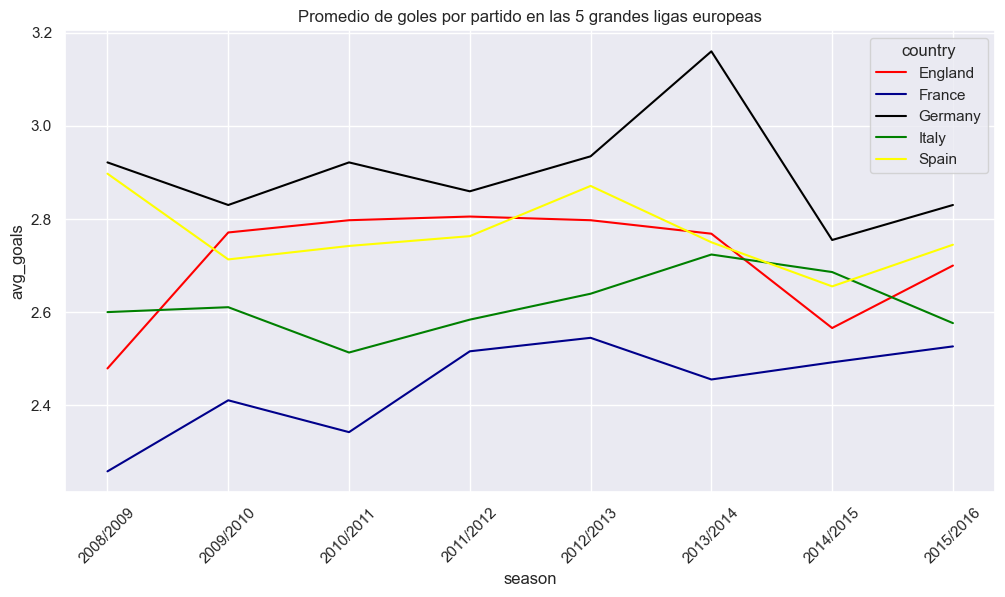

In [115]:
# Linechart that shows the avg. goal per game by season and country
sns.set(rc={'figure.figsize':(12,6)}) # set a visually attractive chart size
palette ={"England": "red", "France": "darkblue", "Germany": "black", "Italy": "green", "Spain": "yellow"}
sns.lineplot(data=stats_5, x='season', y='avg_goals', hue='country', palette=palette)
plt.xticks(rotation=45)
plt.title('Promedio de goles por partido en las 5 grandes ligas europeas')

De este gráfico podemos extraer los siguientes insights relevantes en cuanto a promedio de gol por partido:
* Alemania es la liga con más goles por partido, alcanzando un pico máximo de 3,16 en la temporada 2013/2014. Ha sido la lider en goleo por juego en las 8 temporadas donde tenemos data.
* Francia es la liga donde menos goles se marcan, teniendo el registro más bajo entre todas las ligas, con apenas 2,26 goles por partido. Ha sido la liga menos goleadora en las 8 temporadas donde tenemos data. Sin embargo, se destaca un crecimiento leve en cuota de goles a lo largo del tiempo.
* Inglaterra, España e Italia se encuentran en el medio de las dos ligas antes mencionadas. Se destaca el crecimiento goleador en Italia a partir de la 2010/2011.


                        country  avg_goal  total_goal
league                                               
France Ligue 1           France  2.443092        7427
Italy Serie A             Italy  2.616622        7895
England Premier League  England  2.710526        8240
Spain LIGA BBVA           Spain  2.767105        8412
Germany 1. Bundesliga   Germany  2.901552        7103


Text(0.5, 1.0, 'Promedio de goles por partido en las 5 grandes ligas europeas entre 2008 y 2016')

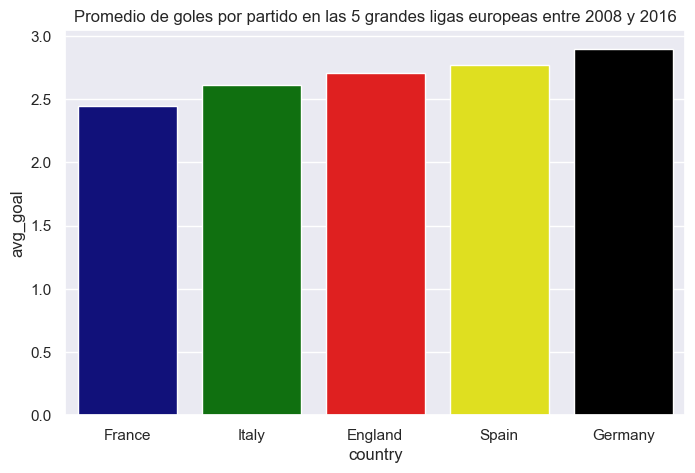

In [116]:
# Ahora crearemos un gráfico que resuma el promedio goleador por país en las 8 temporadas.
stats_6 = stats_5.groupby(['country','league']).agg(
    avg_goal=('avg_goals','mean'),
    total_goal=('total_goals','sum')
)

stats_6.sort_values(by='avg_goal', inplace=True)
stats_6.reset_index(level=0, inplace=True)
print(stats_6)

sns.set(rc={'figure.figsize':(8,5)}) # set a visually attractive chart size
sns.barplot(data=stats_6, x='country', y='avg_goal', palette=palette)
plt.title('Promedio de goles por partido en las 5 grandes ligas europeas entre 2008 y 2016')


Con este gráfico de barras se confirma que la liga alemana es donde más goles se hacen por partido (2,90), y la francesa donde menos (2,44). En segundo lugar goleador está España (2,76), seguido de Inglaterra (2,71) e Italia (2,61).

Text(0.5, 1.0, '10 Temporadas con menos goles por partido para las Top 5 ligas europeas entre 2008-2016')

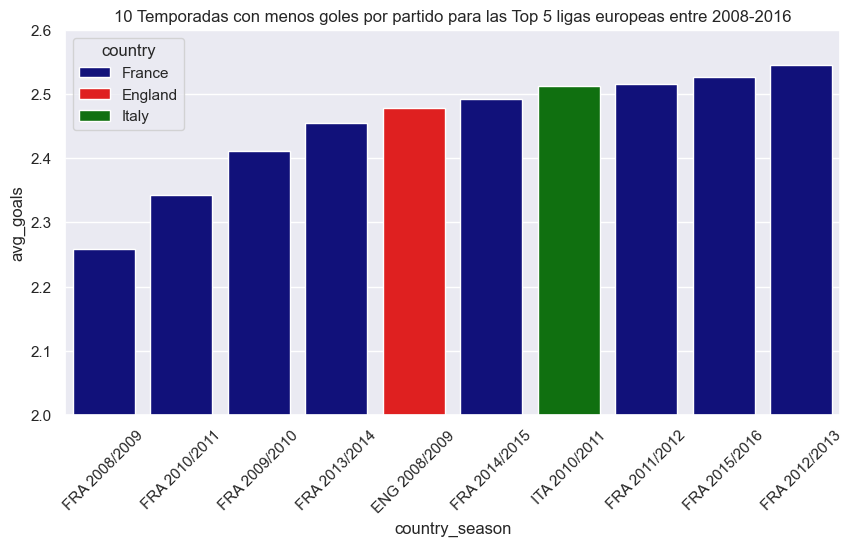

In [117]:
# Por último, veamos en que países se han dado las 10 temporadas con mayor y menor cantidad de goles, en ese periodo de 8 años.
stats_6b = stats_5.sort_values(by='avg_goals')
stats_6b.reset_index(level=[0,2], inplace=True)
stats_6b['country_code'] = stats_6b['country'].str[:3].str.upper() #Get country code (3 letters)
stats_6b['country_season'] = stats_6b['country_code'] + " " + stats_6b['season']

stats_6blow = stats_6b[:10]

sns.set(rc={'figure.figsize':(10,5)}) # set a visually attractive chart size
sns.barplot(data=stats_6blow, x='country_season', y='avg_goals', hue='country', dodge=False, palette=palette)
plt.xticks(rotation=45)
plt.ylim(2, 2.6)
plt.title('10 Temporadas con menos goles por partido para las Top 5 ligas europeas entre 2008-2016')

Francia registra 8 de las 10 temporadas con menos goles en las 5 ligas más importantes de Europa.

Text(0.5, 1.0, '10 Temporadas con más goles por partido para las Top 5 ligas europeas entre 2008-2016')

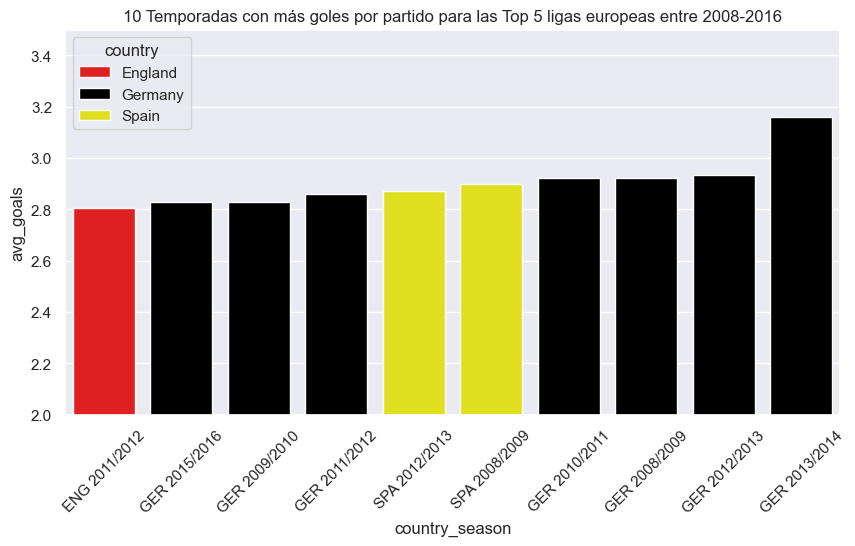

In [118]:
stats_6bhigh = stats_6b.tail(10)

sns.set(rc={'figure.figsize':(10,5)}) # set a visually attractive chart size
sns.barplot(data=stats_6bhigh, x='country_season', y='avg_goals', hue='country', dodge=False, palette=palette)
plt.xticks(rotation=45)
plt.ylim(2, 3.5)
plt.title('10 Temporadas con más goles por partido para las Top 5 ligas europeas entre 2008-2016')

Por el otro lado, Alemania registra 7 de las 10 temporadas con más promedio goleador en las ligas top Europeas entre 2008 y 2016. Seguido de España con 2 e Inglaterra con 1.

7. Juntar las tablas PLAYER donde cada registro es un jugador, con la tabla Player_Attributes, donde cada registro es un jugador/temporada.
Para ello:
* Crear una subquery  de la tabla Player_Attributes donde se agrupan los atributos de cada jugador en un solo registro: media del rating: overall_rating, media del potencial: potential
* Unir esta tabla a la tabla principal PLAYER, utilizando left join.


In [133]:
# Preparar la tabla de atributos promedio
player_att_mean = player_attributes.groupby('player_fifa_api_id').agg(
    {'overall_rating':'mean',
     'potential':'mean'}
)
player_att_mean.reset_index(inplace=True)
player_att_mean

,player_fifa_api_id,overall_rating,potential
0,2,70.600000,71.100000
1,6,72.125000,76.250000
2,11,67.352941,69.411765
3,16,74.125000,76.562500
4,27,76.500000,77.600000
...,...,...,...
11057,233885,52.000000,67.666667
11058,233911,58.000000,66.000000
11059,233930,59.000000,66.000000
11060,233969,58.000000,68.000000


In [134]:
# Unir la tabla de atributos a la tabla general de jugadores
player_7 = player.merge(player_att_mean, how='left', on='player_fifa_api_id')
player_7

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,overall_rating,potential
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,63.600000,67.600000
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,66.969697,74.484848
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,67.000000,74.192308
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,69.086957,70.782609
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,73.240000,74.680000
...,...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,74.384615,75.461538
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,65.687500,71.625000
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,67.571429,72.857143
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,70.750000,78.125000
